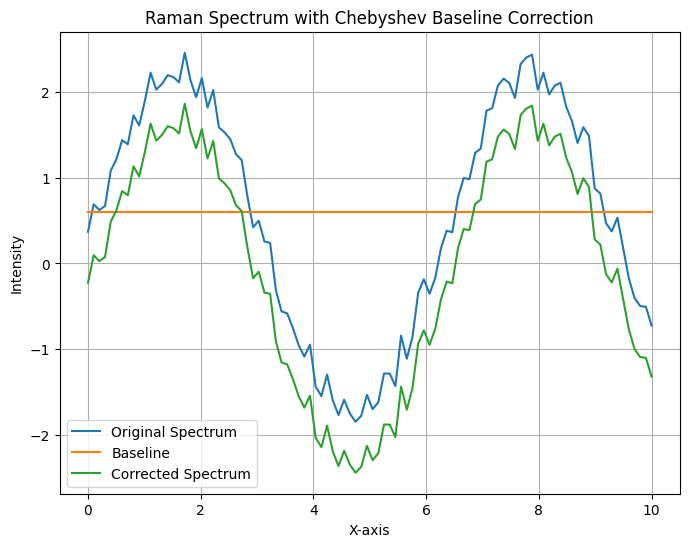

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def chebyshev_polynomial(x, *coeffs):
    """
    Chebyshev polynomial function for baseline correction
    
    Args:
        x (array-like): Input x-values.
        *coeffs: Coefficients of Chebyshev polynomial

    Returns:
        array-like: Predicted baseline values
    """
    n = len(coeffs)
    chebyshev_terms = [coeffs[i] * np.polynomial.chebyshev.chebval(x, (i+1)) for i in range(n)]
    baseline = np.sum(chebyshev_terms, axis=0)
    return baseline

# Sample spectra data (x & y values)
x = np.linspace(0, 10, 100)
y = 2 * np.sin(x) + 0.5 * np.random.rand(len(x))

# Initial guess for Chebyshev polynomial coefficients
initial_guess = [0.1, 0.2, 0.05]

# Fit Chebyshev polynomial to the data
popt, _ = curve_fit(chebyshev_polynomial, x, y, p0=initial_guess)

# Generate baseline using the fitted coefficients
baseline = chebyshev_polynomial(x, *popt)

# Correct the original spectrum by subtracting the baseline
corrected_spectrum = y - baseline

# Plot original spectrum, baseline & corrected spectrum
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Original Spectrum')
plt.plot(x, baseline, label='Baseline')
plt.plot(x, corrected_spectrum, label='Corrected Spectrum')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Intensity')
plt.title('Raman Spectrum with Chebyshev Baseline Correction')
plt.grid(True)
plt.show()